In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import  plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# #reading Data Set 
# data=pd.read_csv("/kaggle/input/consumer-behavior-and-shopping-habits-dataset/shopping_behavior_updated.csv")
data = pd.read_csv("shopping_behavior_updated.csv")
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
#reaing info for each column and their Data Type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [5]:
#Showing number of Columna and rows 
data.shape

(3900, 18)

In [6]:
# Get summary statistics 

data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [7]:
#Showing Each Column in Data set
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [8]:
#Preview  Dataset , first 5 Rows
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [9]:
data.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
313,314,42,Male,Dress,Clothing,77,Vermont,M,Pink,Spring,3.7,Yes,Express,Yes,Yes,50,Credit Card,Every 3 Months
1985,1986,23,Male,Gloves,Accessories,97,Tennessee,M,Gold,Spring,3.9,No,2-Day Shipping,No,No,6,Credit Card,Fortnightly
2448,2449,54,Male,Hat,Accessories,25,Tennessee,S,Violet,Fall,3.0,No,Free Shipping,No,No,38,PayPal,Bi-Weekly
198,199,57,Male,Jewelry,Accessories,45,Utah,M,Turquoise,Winter,4.8,Yes,Standard,Yes,Yes,39,Credit Card,Fortnightly
167,168,33,Male,Gloves,Accessories,27,Arkansas,M,Green,Fall,4.0,Yes,Express,Yes,Yes,14,Credit Card,Every 3 Months


In [10]:
# Finding null values 

data.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [11]:
# Check for duplicate values 

data.drop_duplicates().head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


In [12]:
data.nunique()

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

In [13]:
# Season tion purchase statistics 

Season_purchase_info = data.groupby("Season")["Purchase Amount (USD)"].agg(["mean", "median", "sum"])
Season_purchase_info.head(10)

,mean,median,sum
Season,,,
Fall,61.556923,62.0,60018
Spring,58.737738,58.0,58679
Summer,58.405236,58.0,55777
Winter,60.357364,62.0,58607


In [14]:
# Shipping type 

shipping_type = data.groupby("Location")["Shipping Type"].value_counts()
shipping_type.head(20)

Location  Shipping Type 
Alabama   Express           20
          Store Pickup      19
          Next Day Air      17
          2-Day Shipping    16
          Free Shipping      9
          Standard           8
Alaska    Standard          17
          Free Shipping     14
          2-Day Shipping    13
          Express           13
          Next Day Air       8
          Store Pickup       7
Arizona   Express           12
          Store Pickup      12
          Next Day Air      11
          2-Day Shipping    10
          Free Shipping     10
          Standard          10
Arkansas  Next Day Air      17
          Express           16
Name: count, dtype: int64

In [15]:
# Analyze regional trends 

location_groups = data.groupby("Location")
location_groups.head(300)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [16]:
# Analyze average price by region 

avg_price = location_groups["Purchase Amount (USD)"].mean()
avg_price.sort_values(ascending = False)

Location
Alaska            67.597222
Pennsylvania      66.567568
Arizona           66.553846
West Virginia     63.876543
Nevada            63.379310
Washington        63.328767
North Dakota      62.891566
Virginia          62.883117
Utah              62.577465
Michigan          62.095890
Tennessee         61.974026
New Mexico        61.901235
Rhode Island      61.444444
Texas             61.194805
Arkansas          61.113924
Illinois          61.054348
Mississippi       61.037500
Massachusetts     60.888889
Iowa              60.884058
North Carolina    60.794872
Wyoming           60.690141
South Dakota      60.514286
New York          60.425287
Ohio              60.376623
Montana           60.250000
Idaho             60.075269
Nebraska          59.448276
New Hampshire     59.422535
Alabama           59.112360
California        59.000000
Indiana           58.924051
Georgia           58.797468
South Carolina    58.407895
Oklahoma          58.346667
Missouri          57.913580
Hawaii     

In [17]:
# Analyze most popular category by region 

category_counts = location_groups["Category"].value_counts()
category_counts.groupby("Location").max()

Location
Alabama           41
Alaska            33
Arizona           32
Arkansas          37
California        47
Colorado          32
Connecticut       32
Delaware          41
Florida           30
Georgia           41
Hawaii            29
Idaho             42
Illinois          46
Indiana           37
Iowa              23
Kansas            26
Kentucky          34
Louisiana         44
Maine             34
Maryland          34
Massachusetts     34
Michigan          31
Minnesota         42
Mississippi       33
Missouri          37
Montana           45
Nebraska          37
Nevada            38
New Hampshire     29
New Jersey        26
New Mexico        29
New York          36
North Carolina    35
North Dakota      34
Ohio              34
Oklahoma          38
Oregon            37
Pennsylvania      35
Rhode Island      35
South Carolina    36
South Dakota      28
Tennessee         34
Texas             29
Utah              33
Vermont           43
Virginia          35
Washington        35
West

In [18]:
# Analyze shipping preference by region 

shipping_type = location_groups["Shipping Type"].value_counts()
shipping_type

Location  Shipping Type 
Alabama   Express           20
          Store Pickup      19
          Next Day Air      17
          2-Day Shipping    16
          Free Shipping      9
                            ..
Wyoming   Express           13
          Next Day Air      12
          Standard          11
          Free Shipping     10
          2-Day Shipping     8
Name: count, Length: 300, dtype: int64

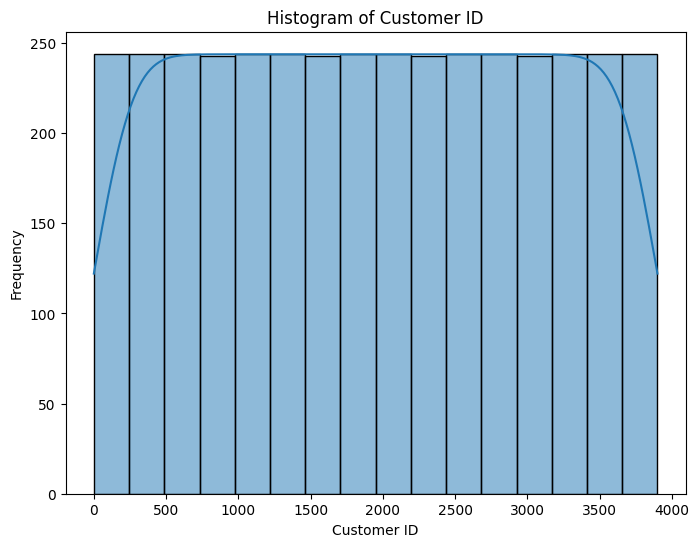

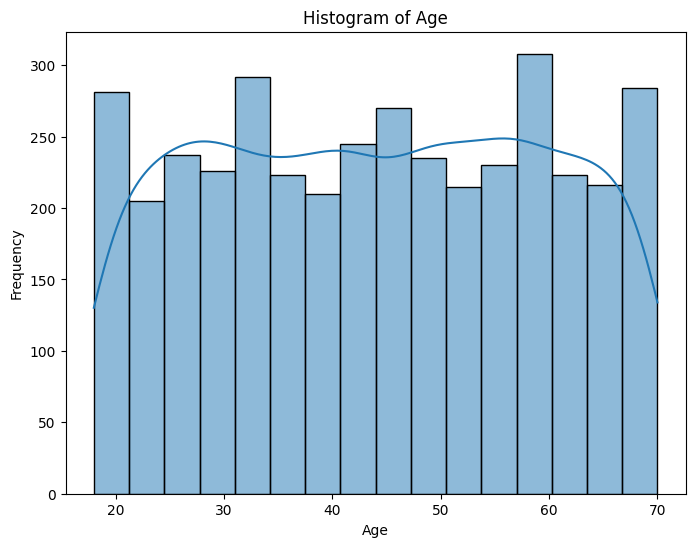

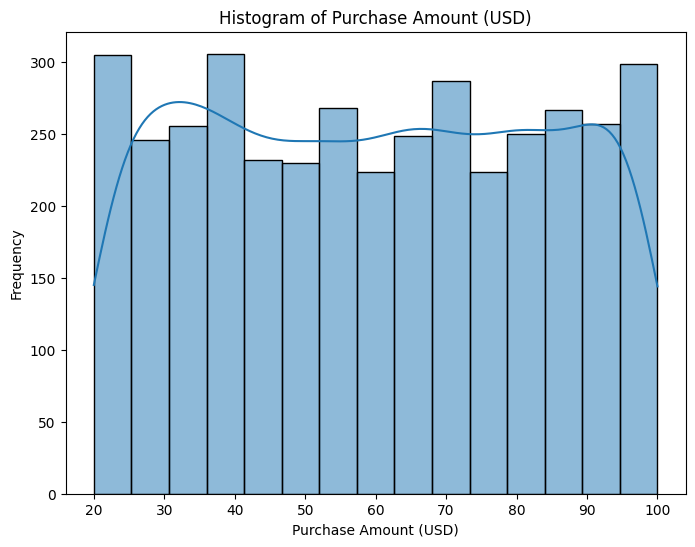

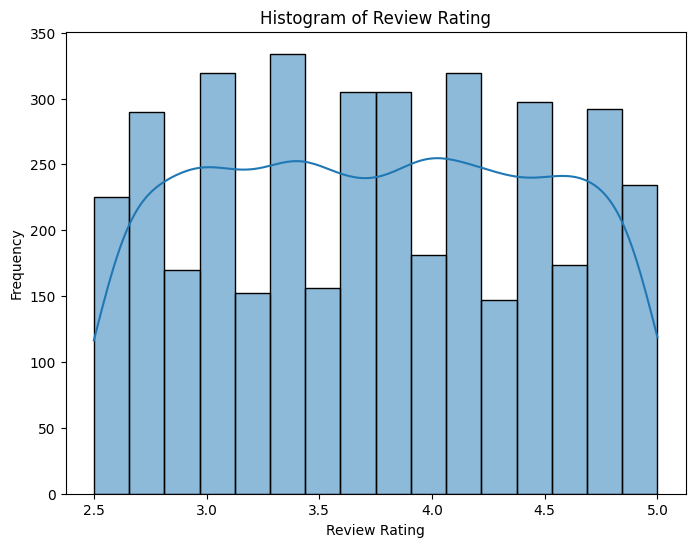

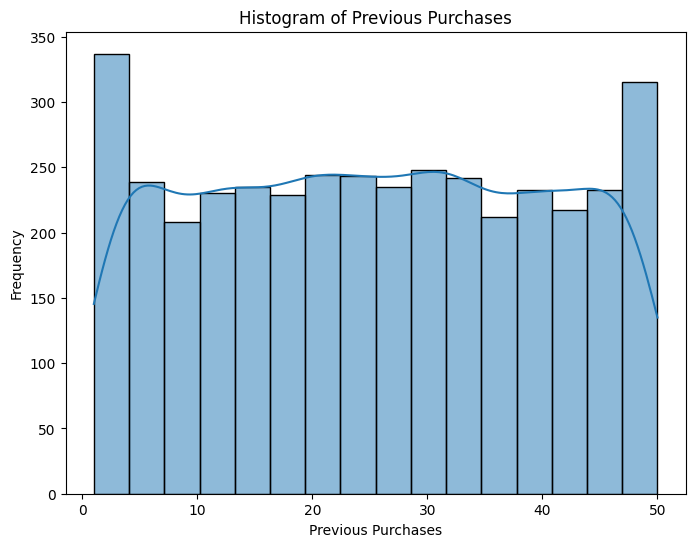

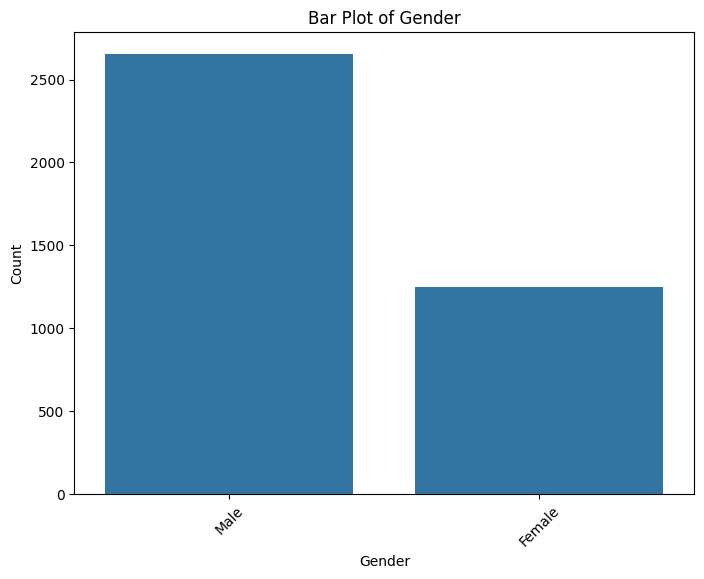

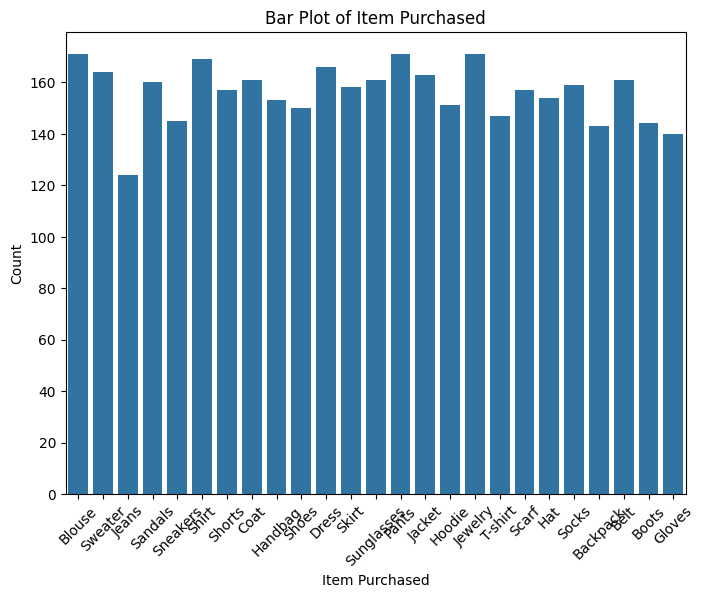

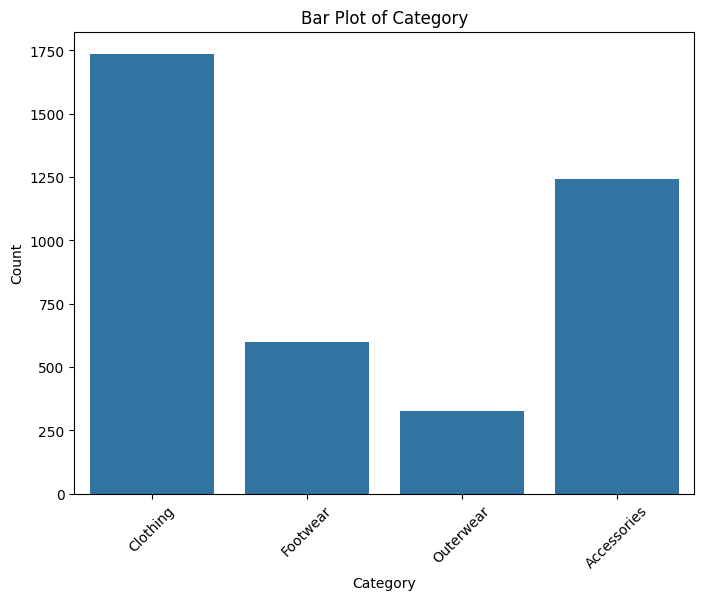

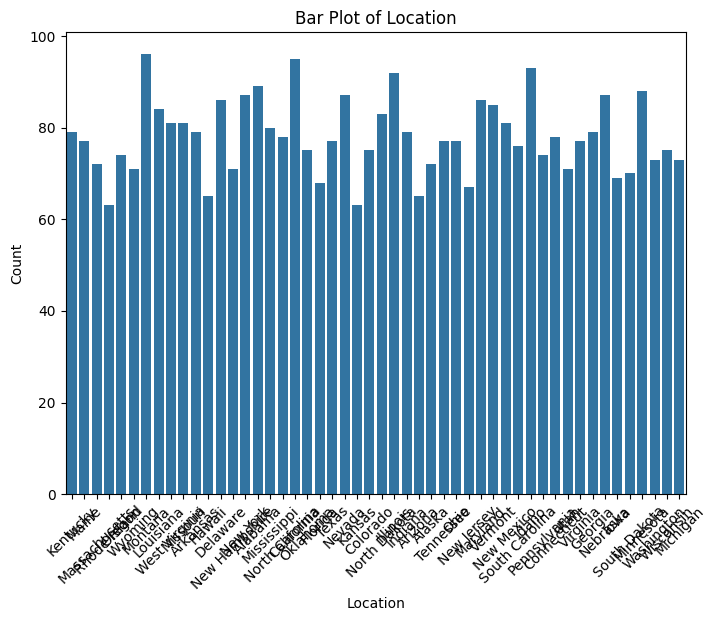

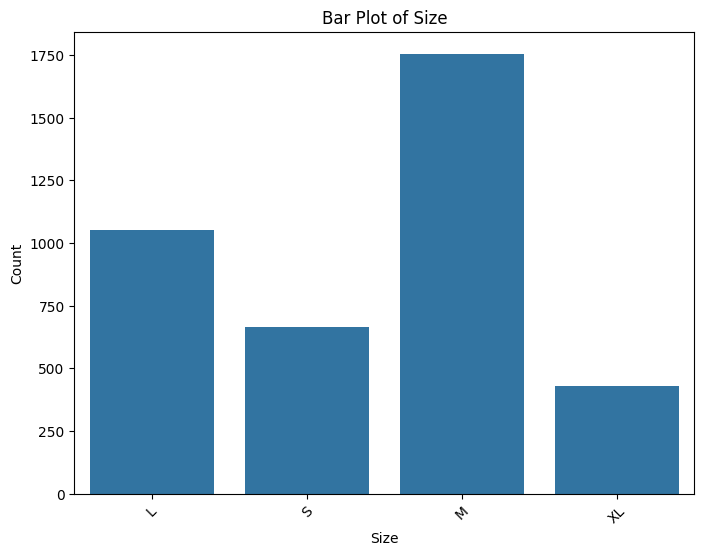

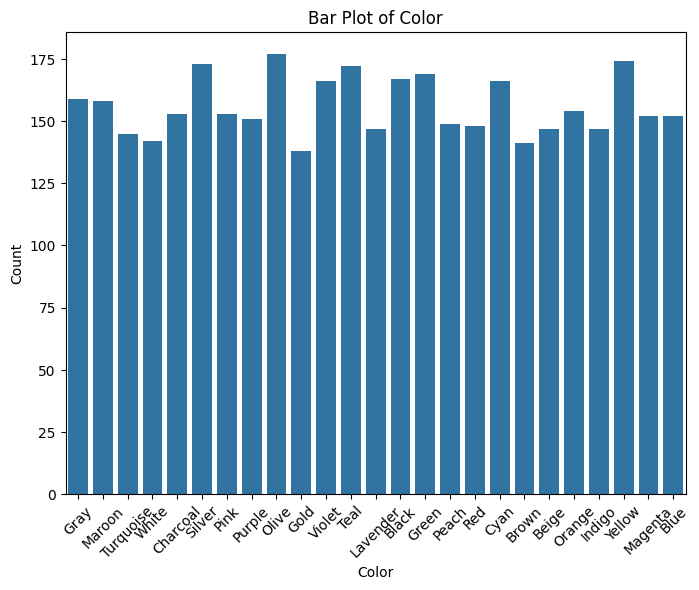

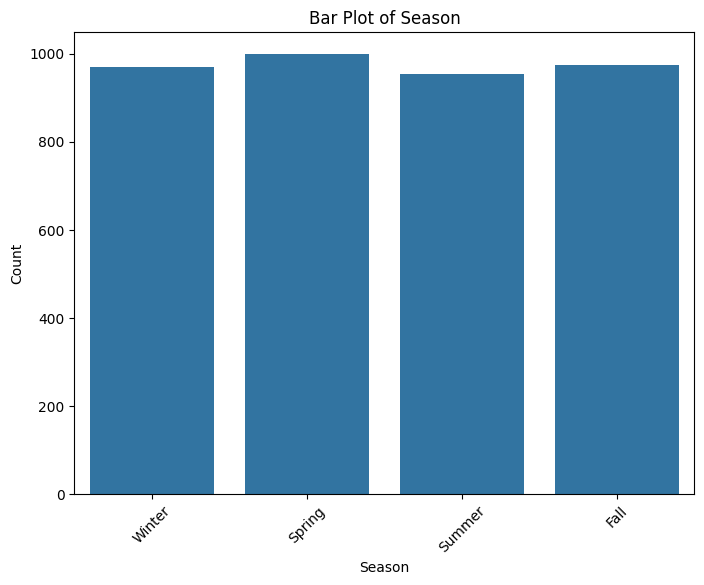

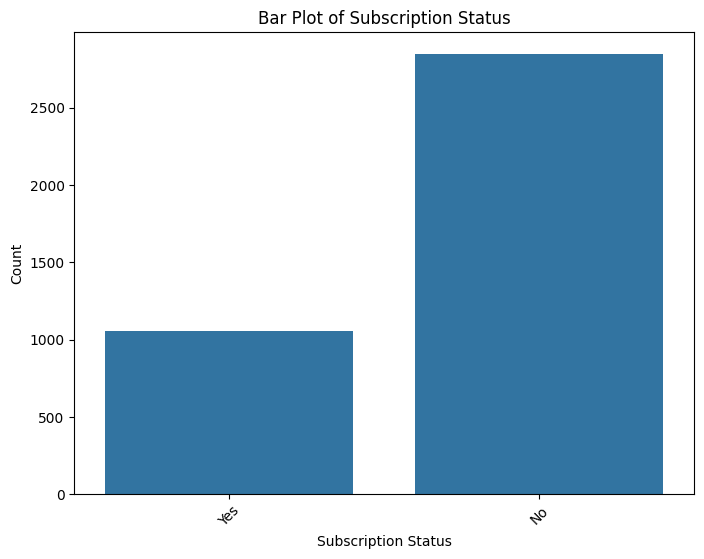

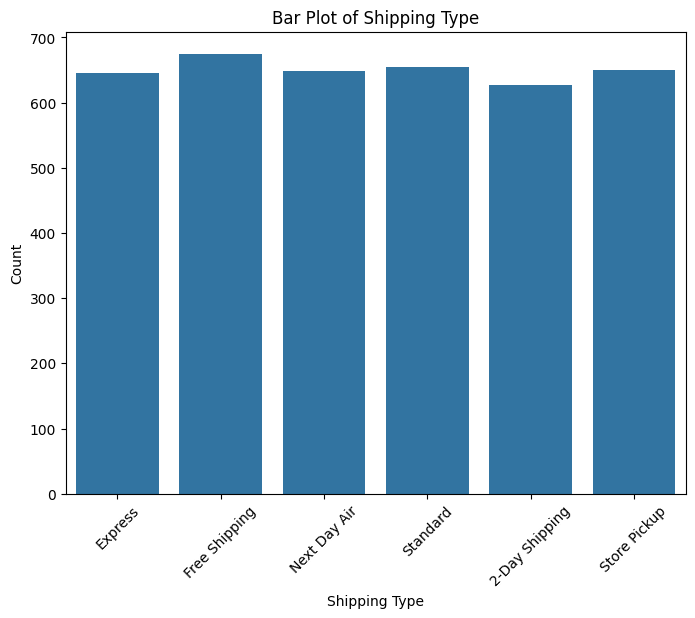

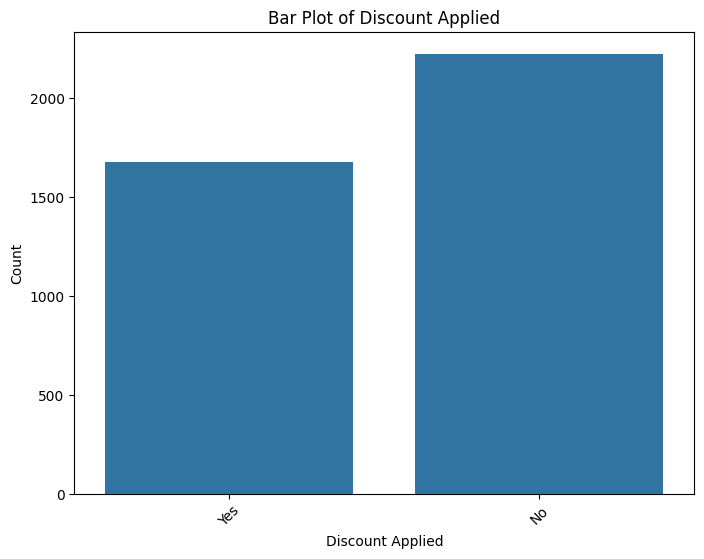

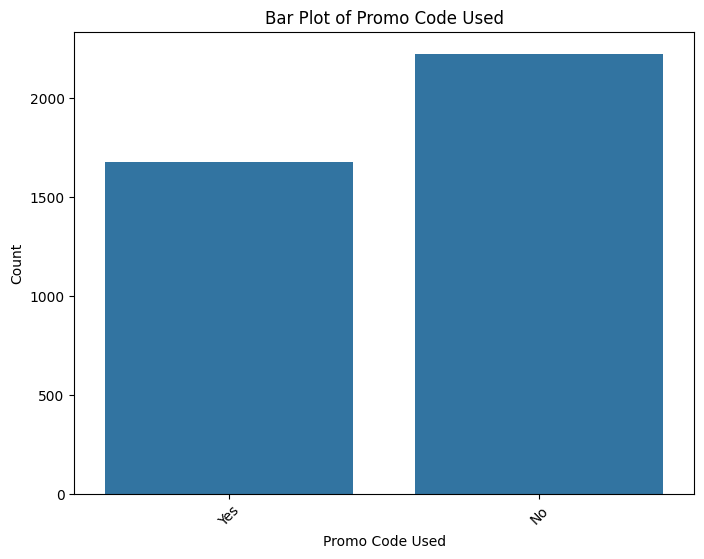

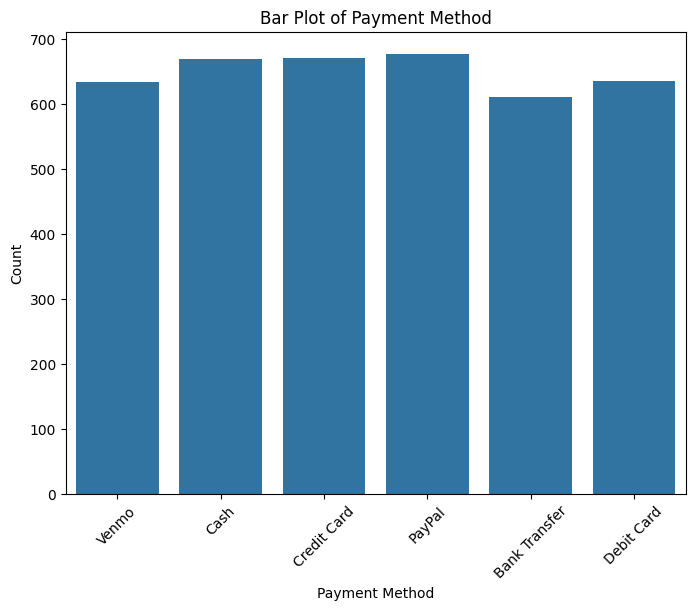

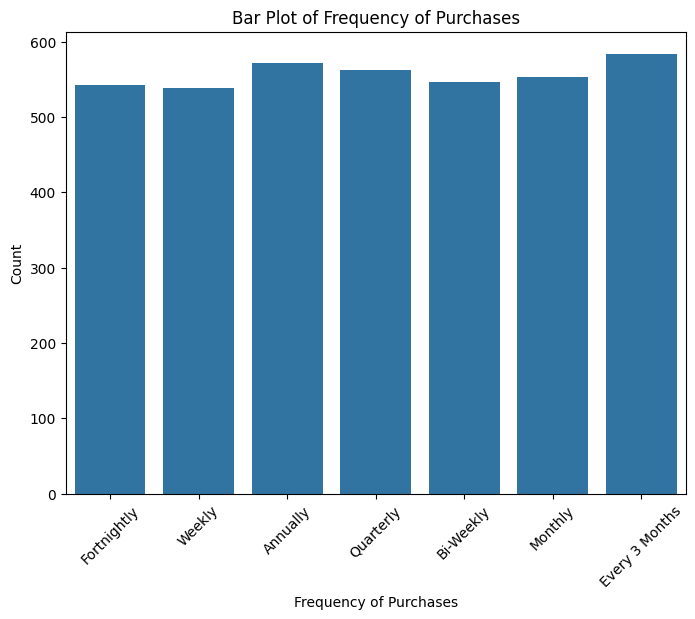

In [19]:
numerical_vars = data.select_dtypes(include=['int64', 'float64']).columns
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=var, kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

# Plot bar plots for categorical variables
categorical_vars = data.select_dtypes(include=['object']).columns
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=var)
    plt.title(f'Bar Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

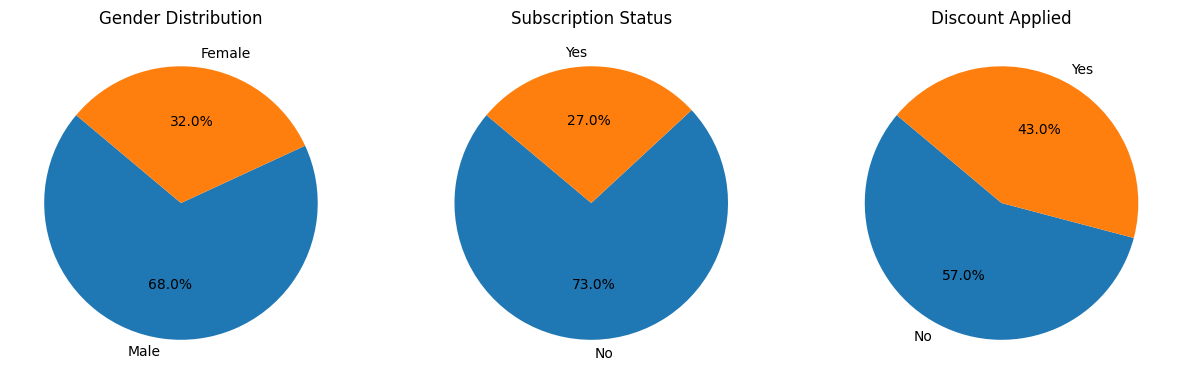

In [20]:
gender_counts = data['Gender'].value_counts()
subscription_counts = data['Subscription Status'].value_counts()
discount_counts = data['Discount Applied'].value_counts()

# Plot pie charts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gender Distribution
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Gender Distribution')

# Subscription Status
axes[1].pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Subscription Status')

# Discount Applied
axes[2].pie(discount_counts, labels=discount_counts.index, autopct='%1.1f%%', startangle=140)
axes[2].set_title('Discount Applied')

plt.show()

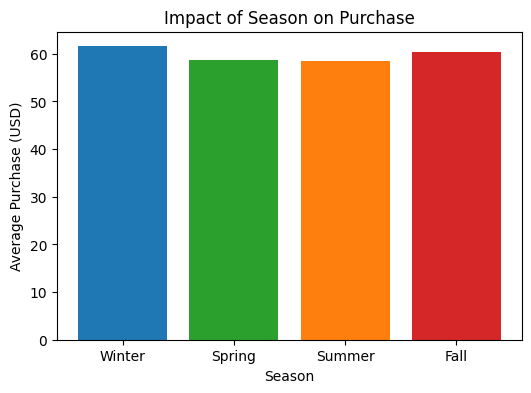

In [21]:
seasons = data['Season'].unique()
average_purchase_by_season = data.groupby('Season')['Purchase Amount (USD)'].mean()

season_colors = {
    'Winter': '#1f77b4',  # Blue
    'Spring': '#2ca02c',  # Green
    'Summer': '#ff7f0e',  # Orange
    'Fall': '#d62728'     # Red
}

plt.figure(figsize=(6, 4))
plt.bar(seasons, average_purchase_by_season,color=[season_colors[season] for season in seasons])
plt.title("Impact of Season on Purchase")
plt.xlabel("Season")
plt.ylabel("Average Purchase (USD)")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12960\1502076153.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Purchase Amount (USD)', data=data, ci=None, palette='viridis')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12960\1502076153.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Purchase Amount (USD)', data=data, ci=None, palette='viridis')


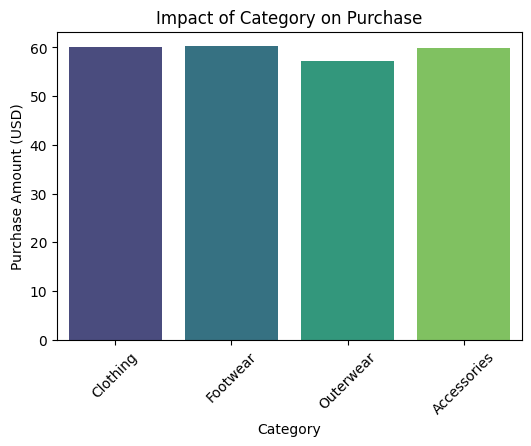

In [22]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Category', y='Purchase Amount (USD)', data=data, ci=None, palette='viridis')
plt.title("Impact of Category on Purchase")
plt.xticks(rotation=45)
plt.show()

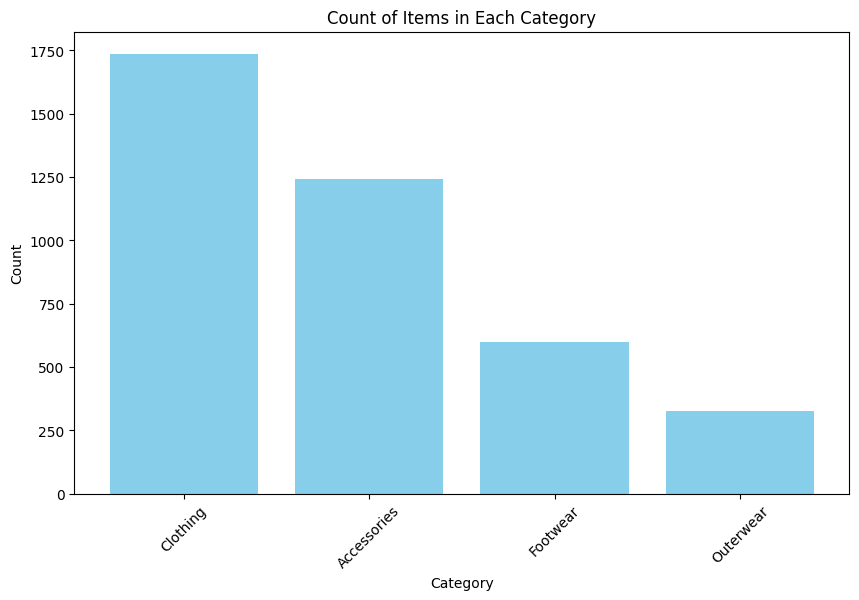

In [23]:
category_counts = data['Category'].value_counts()

plt.figure(figsize=(10, 6))
# Create the bar plot
plt.bar(category_counts.index, category_counts, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Items in Each Category')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12960\2593977661.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Purchase Amount (USD)', data=data, ci=None, palette='viridis', ax=axs[0])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12960\2593977661.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Purchase Amount (USD)', data=data, ci=None, palette='viridis', ax=axs[0])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12960\2593977661.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts, palette='magma', ax=axs[1], order=category_counts.index)


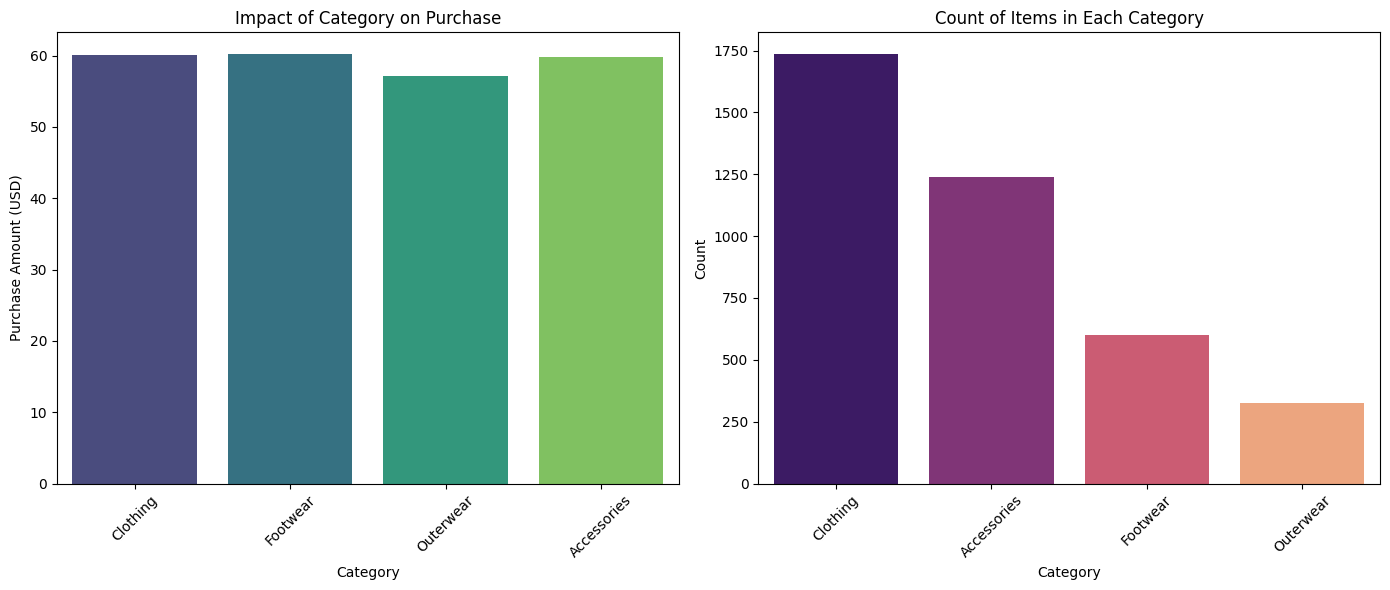

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Category vs Purchase Amount
sns.barplot(x='Category', y='Purchase Amount (USD)', data=data, ci=None, palette='viridis', ax=axs[0])
axs[0].set_title("Impact of Category on Purchase")
axs[0].set_ylabel("Purchase Amount (USD)")
axs[0].set_xlabel("Category")
axs[0].tick_params(axis='x', rotation=45)

# Plot 2: Count of Items in Each Category
category_counts = data['Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts, palette='magma', ax=axs[1], order=category_counts.index)
axs[1].set_title('Count of Items in Each Category')
axs[1].set_ylabel('Count')
axs[1].set_xlabel('Category')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

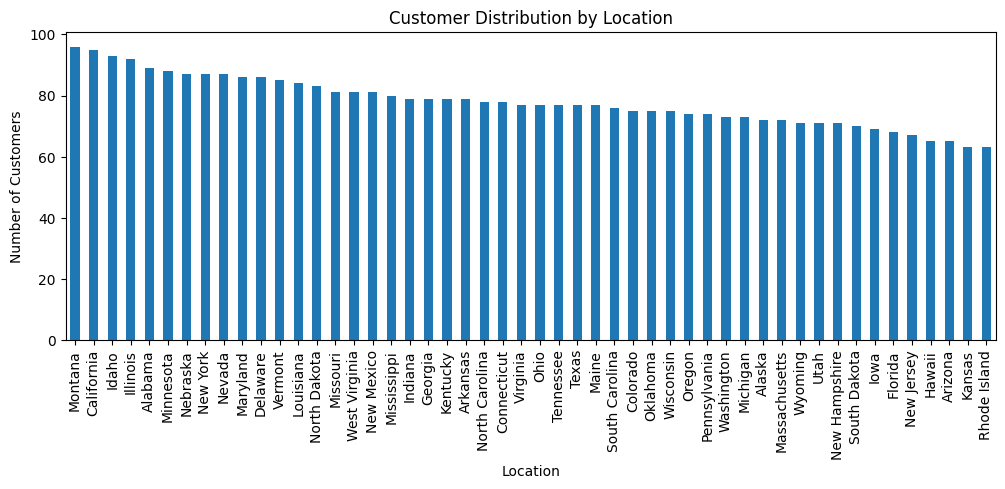

In [25]:
location_counts = data["Location"].value_counts()
location_counts.plot(kind="bar", figsize=(12, 4))
plt.title("Customer Distribution by Location")
plt.xlabel("Location")
plt.ylabel("Number of Customers")
plt.show()

In [35]:
sns.countplot(data=data, x='Size', color='skyblue', ax=axs[0])

# Plot 2: Pie chart of Size counts
size_counts = data['Size'].value_counts()
pie(size_counts, labels=size_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('muted'))
set_title('Size Frequency (Pie Chart)')

plt.tight_layout()
plt.show()

NameError: name 'pie' is not defined